In [32]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [3]:
file = "/Users/Heisen/Work/project/datasets/cifar10/train/cifar-10-batches-py/data_batch_1"
data_batch_1 = unpickle(file)

In [4]:
image = data_batch_1['data'][0]
image = image.reshape(3,32,32)
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


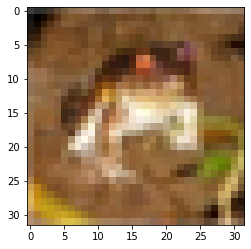

In [5]:
plt.imshow(image)

In [6]:
im = Image.fromarray(image)
im.save("test_image.jpeg")

In [7]:
32//2

16

In [34]:
# def compute_ranges(tensor_dimensions, section_dimensions):
#         """
#         Compute all the ranges for the dimension: (first dimension, second dimension, ...)
#         ranges.

#         """

#         # List of lists: Each element is a list of ranges for the dimension
#         #                that corresponds to the index.
#         ranges = [[]] * len(section_dimensions)
        

#         # For each dimension,
#         for i in range(len(section_dimensions)):
#             # Calculate ranges
#             ranges[i] = compute_size_ranges(
#                 total_size= tensor_dimensions[i],
#                 section_size= section_dimensions[i]
#             )

#         return ranges
def compute_ranges(tensor_dimensions, section_dimensions):
    
    size_of_ranges = len(section_dimensions)*len(section_dimensions)
    ranges = []
    size_ranges = compute_size_ranges(tensor_dimensions[0], section_dimensions[0])
    
    for i in range(len(section_dimensions)):
        for j in range(len(section_dimensions)):
            ranges.append([size_ranges[i],size_ranges[j]])
    return ranges
        
    

def compute_size_ranges(total_size, section_size):
        """
        Create a list of all slice objects; one object per section

        """

        return [
            compute_size_range(i, total_size, section_size)
            for i in range(0, total_size, section_size)
        ]
    
def compute_size_range(i, total_size, section_size):
        """
        Create a slice object given the parameters. The slice object
        represents a range of indices.

        """

        # Range end: Taking the minimum of the two values ensures
        # that the end never exceeds 'total_size'. If the range
        # does exceed 'total_size', it is slided back to make sure
        # it fits. This causes overlap with a previous range.
        end = min(total_size, i + section_size)

        # Range start. Automatically adjusted to slide the range
        # backwards if necessary.
        start = end - section_size

        return slice(start, end)

In [35]:
slices = compute_ranges((32,32),(16,16))
slices

[[slice(0, 16, None), slice(0, 16, None)],
 [slice(0, 16, None), slice(16, 32, None)],
 [slice(16, 32, None), slice(0, 16, None)],
 [slice(16, 32, None), slice(16, 32, None)]]

In [43]:
sections = []
for i in range(len(slices)):
    sections.append(image[slices[i][j]])


IndexError: list index out of range

/Users/Heisen/opt/anaconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


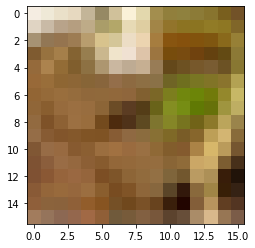

In [41]:
plt.imshow(image[slices[3]])

In [ ]:
def stitch(image, sections, section_dims):
    # Image dimensions
    image_dimensions = (image.shape[0], image.shape[1])

    # Initialize stitched image
    stitched_mask = np.ones(image_dimensions, dtype=np.uint8)

    # Slices generator
    slices_gen = SectionGeneratorMaker([*image_dimensions], section_dims).generator()

    # For each section,
    for i in range(len(sections)):
        # Get the next slice
        current_slice = next(slices_gen)

        # Add the current section to the stitched image
        stitched_mask[current_slice] = sections[i]

    return stitched_mask

In [ ]:
sections = 